# 0.0 - Imports

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Dataset

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Algoritmo: Polinomial Regression Lasso

Parametros
* degree
* alpha
* max_iter

## 2.1 - Performance for Train Dataset

In [4]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform( df_X_train )

# Training model
poly_lasso = Lasso( random_state=77 )
poly_lasso.fit( X_poly_train, df_y_train )

# Predict
y_pred_train = poly_lasso.predict( X_poly_train )

# Performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train}' )
print( f'Train MSE: {mse_train}' )
print( f'Train RMSE: {rmse_train}' )
print( f'Train MAE: {mae_train}' )
print( f'Train MAPE: {mape_train}' )

Train R2: 0.009149935251170582
Train MSE: 473.6387760067563
Train RMSE: 21.763243692215468
Train MAE: 17.28544966126129
Train MAPE: 8.699700898061744


## 2.2 - Performance for Train Dataset

In [5]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val = poly.fit_transform( df_X_val )

# Training model
poly_lasso = Lasso( random_state=77 )
poly_lasso.fit( X_poly_train, df_y_train )

# Predict
y_pred_val = poly_lasso.predict( X_poly_val )

# Performance metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )

print( f'Validation R2: {r2_val}' )
print( f'Validation MSE: {mse_val}' )
print( f'Validation RMSE: {rmse_val}' )
print( f'Validation MAE: {mae_val}' )
print( f'Validation MAPE: {mape_val}' )

Validation R2: 0.009631007774810185
Validation MSE: 472.91269390919564
Validation RMSE: 21.746555909136408
Validation MAE: 17.238378728440562
Validation MAPE: 8.681846557814456


## 2.3 - Hyperparameter Fine Tuning

Degree

In [6]:
degree = np.arange(1, 6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [7]:
for d in degree:
    # Define polynomial model
    poly = PolynomialFeatures( degree=d )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val = poly.fit_transform( df_X_val )
    
    # Training model
    poly_lasso = Lasso( random_state=77 )
    poly_lasso.fit( X_poly_train, df_y_train )

    # Predict
    y_pred_d = poly_lasso.predict( X_poly_val )

    # Performance Metrics
    r2_d = mt.r2_score( df_y_val, y_pred_d )
    mse_d = mt.mean_squared_error( df_y_val, y_pred_d )
    rmse_d = mt.mean_squared_error( df_y_val, y_pred_d, squared=False )
    mae_d = mt.mean_absolute_error( df_y_val, y_pred_d )
    mape_d = mt.mean_absolute_percentage_error( df_y_val, y_pred_d )

    r2_list.append( r2_d )
    mse_list.append( mse_d )
    rmse_list.append( rmse_d )
    mae_list.append( mae_d )
    mape_list.append( mape_d )

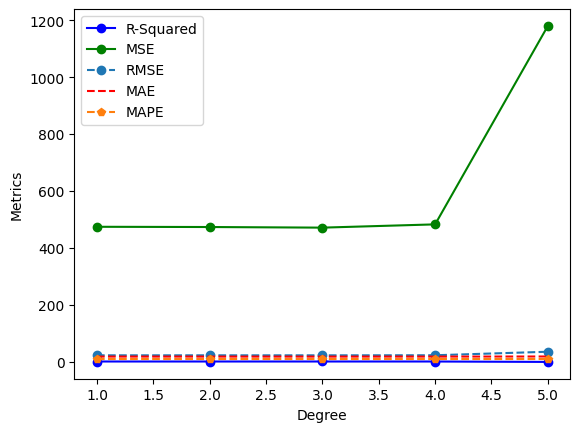

In [8]:
plt.plot( degree, r2_list, 'bo-', label='R-Squared')
plt.plot( degree, mse_list, 'go-', label='MSE')
plt.plot( degree, rmse_list, 'o--', label='RMSE')
plt.plot( degree, mae_list, 'r--', label='MAE')
plt.plot( degree, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Degree' )
plt.ylabel( 'Metrics' )
plt.legend();

In [9]:
best_degree = degree[ np.argmin( mse_list ) ]
best_degree

3

Alpha

In [10]:
alpha = np.arange( 0.0, 5.0, 0.2 )

r2_list_a = []
mse_list_a = []
rmse_list_a = []
mae_list_a = []
mape_list_a = []

In [11]:
for a in alpha:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train_a = poly.fit_transform( df_X_train )
    X_poly_val_a = poly.fit_transform( df_X_val )
    
    # Training model
    poly_lasso_a = Lasso( random_state=77, alpha=a )
    poly_lasso_a.fit( X_poly_train_a, df_y_train )

    # Predict
    y_pred_a = poly_lasso_a.predict( X_poly_val_a )

    # Performance Metrics
    r2_a = mt.r2_score( df_y_val, y_pred_a )
    mse_a = mt.mean_squared_error( df_y_val, y_pred_a )
    rmse_a = mt.mean_squared_error( df_y_val, y_pred_a, squared=False )
    mae_a = mt.mean_absolute_error( df_y_val, y_pred_a )
    mape_a = mt.mean_absolute_percentage_error( df_y_val, y_pred_a )

    r2_list_a.append( r2_a )
    mse_list_a.append( mse_a )
    rmse_list_a.append( rmse_a )
    mae_list_a.append( mae_a )
    mape_list_a.append( mape_a )

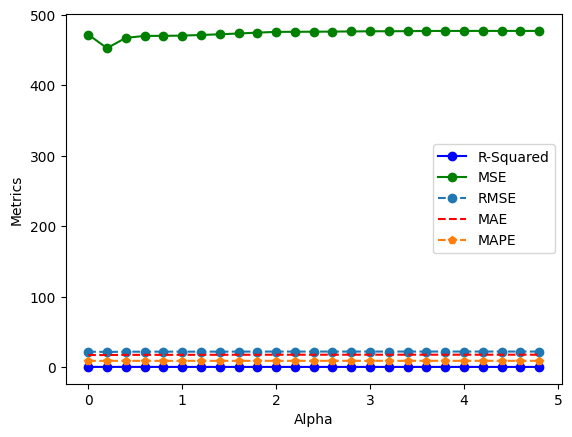

In [12]:
plt.plot( alpha, r2_list_a, 'bo-', label='R-Squared')
plt.plot( alpha, mse_list_a, 'go-', label='MSE')
plt.plot( alpha, rmse_list_a, 'o--', label='RMSE')
plt.plot( alpha, mae_list_a, 'r--', label='MAE')
plt.plot( alpha, mape_list_a, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_alpha = alpha[ np.argmin(mse_list_a )]
best_alpha

0.2

Max Iter

In [14]:
max_iter = np.arange( 200, 2100, 100 )

r2_list_m = []
mse_list_m = []
rmse_list_m = []
mae_list_m = []
mape_list_m = []

In [15]:
for m in max_iter:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train_m = poly.fit_transform( df_X_train )
    X_poly_val_m = poly.fit_transform( df_X_val )
    
    # Training model
    poly_lasso_m = Lasso( random_state=77, alpha=best_alpha, max_iter=m )
    poly_lasso_m.fit( X_poly_train_m, df_y_train )

    # Predict
    y_pred_m = poly_lasso_a.predict( X_poly_val_m )

    # Performance Metrics
    r2_m = mt.r2_score( df_y_val, y_pred_m )
    mse_m = mt.mean_squared_error( df_y_val, y_pred_m )
    rmse_m = mt.mean_squared_error( df_y_val, y_pred_m, squared=False )
    mae_m = mt.mean_absolute_error( df_y_val, y_pred_m )
    mape_m = mt.mean_absolute_percentage_error( df_y_val, y_pred_m )

    r2_list_m.append( r2_m )
    mse_list_m.append( mse_m )
    rmse_list_m.append( rmse_m )
    mae_list_m.append( mae_m )
    mape_list_m.append( mape_m )

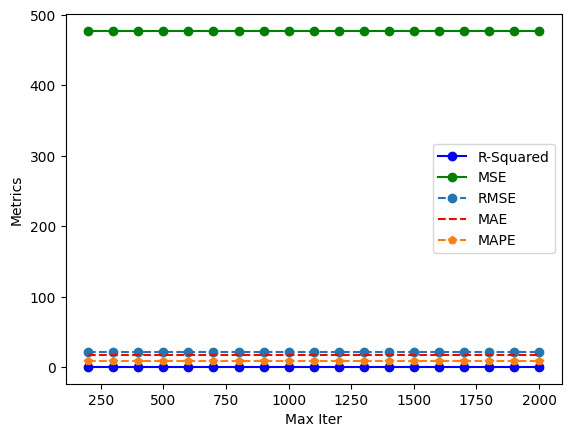

In [16]:
plt.plot( max_iter, r2_list_m, 'bo-', label='R-Squared')
plt.plot( max_iter, mse_list_m, 'go-', label='MSE')
plt.plot( max_iter, rmse_list_m, 'o--', label='RMSE')
plt.plot( max_iter, mae_list_m, 'r--', label='MAE')
plt.plot( max_iter, mape_list_m, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [17]:
best_iter = max_iter[ np.argmin( mse_list_m) ]
best_iter

200

## 2.4 - Performance for Test Dataset

In [18]:
# Define polynomial model
poly = PolynomialFeatures( degree=best_degree )
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val = poly.fit_transform( df_X_val )
X_poly_test = poly.fit_transform( df_X_test )

# Training model
poly_lasso = Lasso( random_state=77, alpha=best_alpha, max_iter=best_iter )
poly_lasso.fit(np.concatenate( ( X_poly_train, X_poly_val) ) , np.concatenate( ( df_y_train, df_y_val )) )

# Predict
y_pred_test = poly_lasso.predict( X_poly_test )

# Performance Metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )


print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.05621334
Test MSE: 459.5306
Test RMSE: 21.43667
Test MAE: 17.01685
Test MAPE: 8.575682


# 3.0 - Algoritmo: Polinomial Regression - Ridge

Parametros:
* degree
* alpha
* max_iter

## 3.0.1 - Copy Dataset

In [19]:
# Train Dataset - Copy
X_train_ridge = df_X_train.copy() 
y_train_ridge = df_y_train.copy()  

# Validation Dataset - Copy
X_val_ridge = df_X_val.copy()  
y_val_ridge = df_y_val.copy()  

# Validation Dataset - Copy
X_test_ridge = df_X_test.copy()  
y_test_ridge = df_y_test.copy()  

## 3.1 - Performance for Train Dataset

In [20]:
# Define 
poly = PolynomialFeatures( )
X_poly_train = poly.fit_transform( X_train_ridge )

# Training
poly_ridge = Ridge( random_state=77 )
poly_ridge.fit( X_poly_train, y_train_ridge )

# Predict
y_pred_train = poly_ridge.predict( X_poly_train )

# Performance metrics
r2_train = mt.r2_score( y_train_ridge, y_pred_train )
mse_train = mt.mean_squared_error( y_train_ridge, y_pred_train )
rmse_train = mt.mean_squared_error( y_train_ridge, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( y_train_ridge, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( y_train_ridge, y_pred_train )


print( f'Train R2: {r2_train}' )
print( f'Train MSE: {mse_train}' )
print( f'Train RMSE: {rmse_train}' )
print( f'Train MAE: {mae_train}' )
print( f'Train MAPE: {mape_train}' )

Train R2: 0.09317140761274367
Train MSE: 433.47545690992723
Train RMSE: 20.82007341269303
Train MAE: 16.47197183768649
Train MAPE: 8.372689165744577


## 3.2 - Performance for Validation Dataset

In [21]:
# Define 
poly = PolynomialFeatures( )
X_poly_train = poly.fit_transform( X_train_ridge )
X_poly_val = poly.fit_transform( X_val_ridge )

# Training
poly_ridge = Ridge( random_state=77 )
poly_ridge.fit( X_poly_train, y_train_ridge )

# Predict
y_pred_val = poly_ridge.predict( X_poly_val )

# Performance metrics
r2_val = mt.r2_score( y_val_ridge, y_pred_val )
mse_val = mt.mean_squared_error( y_val_ridge, y_pred_val )
rmse_val = mt.mean_squared_error( y_val_ridge, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( y_val_ridge, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( y_val_ridge, y_pred_val )


print( f'Validation R2: {r2_val:.7}' )
print( f'Validation MSE: {mse_val:.7}' )
print( f'Validation RMSE: {rmse_val:.7}' )
print( f'Validation MAE: {mae_val:.7}' )
print( f'Validation MAPE: {mape_val:.7}' )

Validation R2: 0.0676993
Validation MSE: 445.1844
Validation RMSE: 21.09939
Validation MAE: 16.73874
Validation MAPE: 8.568992


## 3.3 - Hyperparamater Fine Tuning

## Degree

In [22]:
degree = np.arange( 1,6 )

r2_list_d = []
mse_list_d = []
rmse_list_d = []
mae_list_d = []
mape_list_d = []

In [23]:
for d in degree:
    # Define polynomial model
    poly = PolynomialFeatures( degree=d )
    X_poly_train = poly.fit_transform( X_train_ridge )
    X_poly_val = poly.fit_transform( X_val_ridge )

    # Trainining
    poly_ridge = Ridge( random_state=77 )
    poly_ridge.fit( X_poly_train, y_train_ridge )

    # Predict
    y_pred = poly_ridge.predict( X_poly_val )

    # performance Metrics
    r2_d = mt.r2_score( y_val_ridge, y_pred )
    mse_d = mt.mean_squared_error( y_val_ridge, y_pred )
    rmse_d = np.sqrt( mse_d )
    mae_d = mt.mean_absolute_error( y_val_ridge, y_pred )
    mape_d = mt.mean_absolute_percentage_error( y_val_ridge, y_pred )

    r2_list_d.append( r2_d )
    mse_list_d.append( mse_d )
    rmse_list_d.append( rmse_d )
    mae_list_d.append( mae_d )
    mape_list_d.append( mape_d )

    print( f'Degree: {d}, RMSE: {rmse_d}' )

Degree: 1, RMSE: 21.411339907252348
Degree: 2, RMSE: 21.09939359895817
Degree: 3, RMSE: 22.66672230189467
Degree: 4, RMSE: 118.56201816076153
Degree: 5, RMSE: 358.357251617637


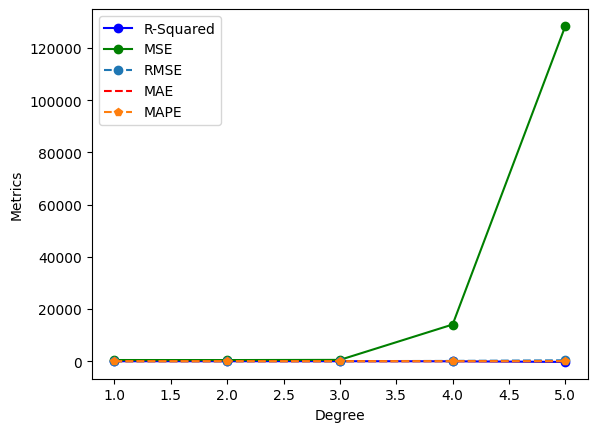

In [24]:
plt.plot( degree, r2_list_d, 'bo-', label='R-Squared')
plt.plot( degree, mse_list_d, 'go-', label='MSE')
plt.plot( degree, rmse_list_d, 'o--', label='RMSE')
plt.plot( degree, mae_list_d, 'r--', label='MAE')
plt.plot( degree, mape_list_d, 'p--', label='MAPE')
plt.xlabel( 'Degree' )
plt.ylabel( 'Metrics' )
plt.legend();

In [25]:
best_degree = degree[ np.argmin( mse_list_d)]
best_degree

2

## Alpha

In [26]:
alpha = np.arange( 0.0, 5.0, 0.2 )

r2_list_a = []
mse_list_a = []
rmse_list_a = []
mae_list_a = []
mape_list_a = []

In [27]:
for a in alpha:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train = poly.fit_transform( X_train_ridge )
    X_poly_val = poly.fit_transform( X_val_ridge )

    # Trainining
    poly_ridge = Ridge( random_state=77, alpha=a )
    poly_ridge.fit( X_poly_train, y_train_ridge )

    # Predict
    y_pred = poly_ridge.predict( X_poly_val )

    # performance Metrics
    r2_a = mt.r2_score( y_val_ridge, y_pred )
    mse_a = mt.mean_squared_error( y_val_ridge, y_pred )
    rmse_a = np.sqrt( mse_d )
    mae_a = mt.mean_absolute_error( y_val_ridge, y_pred )
    mape_a = mt.mean_absolute_percentage_error( y_val_ridge, y_pred )

    r2_list_a.append( r2_a )
    mse_list_a.append( mse_a )
    rmse_list_a.append( rmse_a )
    mae_list_a.append( mae_a )
    mape_list_a.append( mape_a )

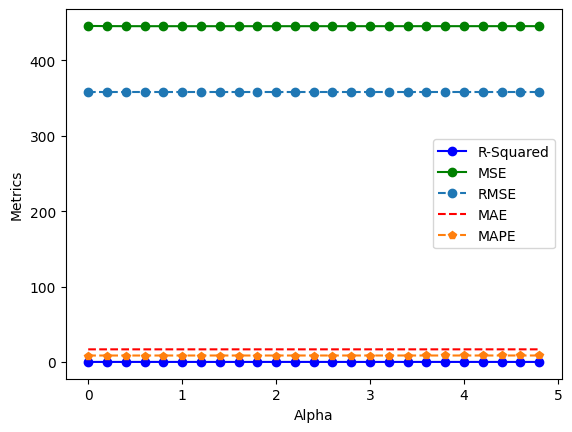

In [28]:
plt.plot( alpha, r2_list_a, 'bo-', label='R-Squared')
plt.plot( alpha, mse_list_a, 'go-', label='MSE')
plt.plot( alpha, rmse_list_a, 'o--', label='RMSE')
plt.plot( alpha, mae_list_a, 'r--', label='MAE')
plt.plot( alpha, mape_list_a, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [29]:
best_alpha = alpha[ np.argmin(mse_list_a) ]
best_alpha

1.2000000000000002

## Max Iter

In [30]:
max_iter = np.arange( 100, 2100, 100 )

r2_list_m = []
mse_list_m = []
rmse_list_m = []
mae_list_m = []
mape_list_m = []

In [31]:
for m in max_iter:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train = poly.fit_transform( X_train_ridge )
    X_poly_val = poly.fit_transform( X_val_ridge )

    # Trainining
    poly_ridge = Ridge( random_state=77, alpha=best_alpha, max_iter=m )
    poly_ridge.fit( X_poly_train, y_train_ridge )

    # Predict
    y_pred = poly_ridge.predict( X_poly_val )

    # performance Metrics
    r2_m = mt.r2_score( y_val_ridge, y_pred )
    mse_m = mt.mean_squared_error( y_val_ridge, y_pred )
    rmse_m = np.sqrt( mse_d )
    mae_m = mt.mean_absolute_error( y_val_ridge, y_pred )
    mape_m = mt.mean_absolute_percentage_error( y_val_ridge, y_pred )

    r2_list_m.append( r2_m )
    mse_list_m.append( mse_m )
    rmse_list_m.append( rmse_m )
    mae_list_m.append( mae_m )
    mape_list_m.append( mape_m )

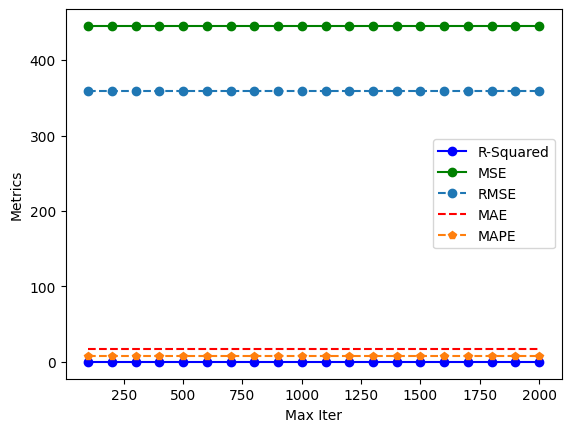

In [32]:
plt.plot( max_iter, r2_list_m, 'bo-', label='R-Squared')
plt.plot( max_iter, mse_list_m, 'go-', label='MSE')
plt.plot( max_iter, rmse_list_m, 'o--', label='RMSE')
plt.plot( max_iter, mae_list_m, 'r--', label='MAE')
plt.plot( max_iter, mape_list_m, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [33]:
best_iter = max_iter[ np.argmin(mse_list_m) ]
best_iter

100

## 2.4 - Performance for Test Dataset

In [35]:
# Define polynomial model
poly = PolynomialFeatures( degree=best_degree )
X_poly_train = poly.fit_transform( X_train_ridge )
X_poly_val   = poly.fit_transform( X_val_ridge ) 
X_poly_test  = poly.fit_transform( X_test_ridge ) 

# Training
poly_ridge = Ridge( random_state=77, alpha=best_alpha, max_iter=best_iter )
poly_ridge.fit( np.concatenate(( X_poly_train,X_poly_val )), np.concatenate(( y_train_ridge, y_val_ridge )) )

# Predict
y_pred_test = poly_ridge.predict( X_poly_test )

# Performance metrics
r2_test = mt.r2_score( y_test_ridge,y_pred_test )
mse_test = mt.mean_squared_error( y_test_ridge,y_pred_test )
rmse_test = mt.mean_squared_error( y_test_ridge,y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( y_test_ridge,y_pred_test )
mape_test = mt.mean_absolute_percentage_error( y_test_ridge,y_pred_test )

print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.09007962
Test MSE: 443.0411
Test RMSE: 21.04854
Test MAE: 16.74375
Test MAPE: 8.31191
